In [1]:
%time
'''
first we test the core/interface extractor, since it is most essential
'''
import sys
sys.path.append('..')
%matplotlib inline
# output workaround, sometimes necessary
#import matplotlib
#matplotlib.use('Agg')
from eden.converter.graph.gspan import gspan_to_eden
from graphlearn.graphlearn import GraphLearnSampler
from eden.graph import Vectorizer
import matplotlib.pyplot as plt
import itertools
from eden.util import fit, random_bipartition_iter
from sklearn.linear_model import SGDClassifier
import random


# a vectorizer
vectorizer = Vectorizer( complexity=3 )

# select 1st element in an iterator
def unpack(graphs):
    for graphlist in graphs:
        yield graphlist[0]


# positive set contains 2401 elements, of which we use 30% to test of we cen improve them ,
# the rest is used for the oracle
lenpo=int(2401*.3)


sampler_graph,oracle = random_bipartition_iter(gspan_to_eden('bursi.pos.gspan'),.3)

# we create an oracle
estimator=fit(oracle,gspan_to_eden('bursi.neg.gspan'),vectorizer)
print 'estimator ok'


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.2 µs
estimator ok


[array([ 0.79157607])]
[array([-0.50827401])]


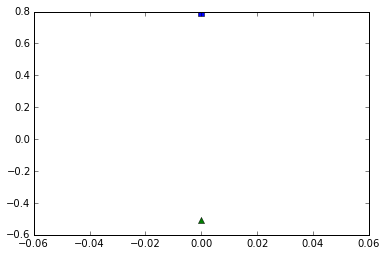

In [2]:


# ok we create an iterator over the graphs we want to work with... 
graphs_pos= sampler_graph


# save results here:
originals=[]
improved=[]

# we want to use an increasing part of the test set.. 
percentages=[.01, .05, .12, .25, .5 ,1 ]
percentages=[.1]

sampler = GraphLearnSampler()

for perc in percentages:
    
    # we work with count many graphs
    count = int(lenpo*perc)
    # make copy of graphiterator
    # select count random elements
    # triplicate  the count long iterator
    graphs_pos, graphs_pos_ = itertools.tee(graphs_pos)
  
    # i pic only perc many for this run
    graphs_pos_,trash = random_bipartition_iter(graphs_pos_, perc )
    
    graphs_pos_,graphs_pos__,graphs_pos___ = itertools.tee(graphs_pos_,3)


    # do sampling
    sampler.fit(graphs_pos__,n_jobs=4)

    improved_graphs = sampler.sample( graphs_pos_,
                        same_radius=False,
                        same_core_size=False,
                        sampling_interval=9999,
                        select_cip_max_tries=100,
                        batch_size=int(count/4)+1,
                        n_steps=100,
                        n_jobs=1,
                        annealing_factor=0.9)

    
    
    #calculate the score of the improved versions
    #calculate score of the originals
    avg_imp=sum( [estimator.decision_function(e) for e in vectorizer.transform(unpack(improved_graphs)) ] )/count
    avg_ori=sum( [estimator.decision_function(e) for e in vectorizer.transform(graphs_pos___)] )/count
    improved.append(avg_imp)
    originals.append(avg_ori)


t = range(len(percentages))
# originals are blue
# improved ones are green

print originals
print improved
plt.plot(t,originals ,'bs')
plt.plot(t, improved ,'g^')
plt.savefig('zomg.png')





In [4]:
'''
inform me when done !
'''
import os
os.system("( speaker-test -t sine -f 2000 )& pid=$! ; sleep 5.0s ; kill -9 $pid")

0

In [10]:
def zomg():
    for z in range(4):
        yield z
        
import itertools

def usor(z):
    z,z1=itertools.tee(z)
    s=0
    for e in z:
        s+=e
    print s
    
z=zomg()
usor(z)
usor(z)


6
0
